# ✨Bienvenidos✨ <img src="https://raw.githubusercontent.com/cgiohidalgo/JupyterHub-nbgrader/main/logo.png" alt="udenar" width="180"/>
<div style="text-align: center"> MODULO DE ANALÍTICA DE DATOS</div>
<div style="text-align: center"> Maestría de Ingeniería de Sistemas y Computación </div>
 <div style="text-align: center">Victor Bucheli (victor.bucheli@correounivalle.edu.co) - Giovanny Hidalgo (carlos.hidalgo@correounivalle.edu.co)
</div>


## _Proyecto Final Analitica de Datos..._

- Presentado por: Sandra Marcela Guerrero Calvache, Juan David Delgado, Wilmer Escobar.



## Modelos de Analitica de Datos: Máquinas de Soporte Vectorial (VSM)

El dataset se compone de 657 registros de 5 cursos de A&G que se dictaron en el año 2019 cohorte II, los cuales pertenecen a cinco programas de la Facultad de Ingeniería de la Universidad del Valle



In [1]:
# importanto SVM
from sklearn import svm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [2]:
#Carga los datos provenientes de un csv
datos = pd.read_csv("estudiantes_final.csv", sep=',')

In [3]:
datos

,Error1,Error2,Error3,Aceptado,Parcial1,Parcial2,Final,Tiempo,GanaCurso,Entregas
0,3.0,1.0,0.0,2,3.00,3.000,3.0000,48.97,1,6.0
1,2.0,0.0,1.0,2,4.58,3.788,4.1840,20.35,1,5.0
2,4.0,1.0,0.0,1,3.20,2.877,3.0385,56.01,1,6.0
3,4.0,2.0,0.0,2,4.15,4.008,4.0790,66.62,1,8.0
4,4.0,2.0,0.0,1,3.13,2.827,2.9785,69.71,0,7.0
...,...,...,...,...,...,...,...,...,...,...
652,6.0,3.0,2.0,2,4.00,4.850,4.4242,63.16,1,13.0
653,3.0,1.0,0.0,2,3.08,3.470,3.2775,35.11,1,6.0
654,1.0,1.0,1.0,2,3.92,3.950,3.9360,21.39,1,5.0
655,6.0,3.0,2.0,2,4.68,3.040,3.8613,24.07,1,13.0


In [4]:
#datos1 = datos
#datos1 = datos1.drop(['Final'], axis=1)
#datos1

In [5]:
X=datos.iloc[:,6:8].values
y=datos.iloc[:,8].values 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,random_state=42) # 70% training and 30% test

In [7]:
from sklearn import svm
# Creando el SVM con sus diferentes métodos

#clf = svm.SVC(kernel='linear') # Linear Kernel
C = 1.0  # parametro de regulacion SVM // Con el fin de permitir cierta flexibilidad, las SVM manejan un parámetro C
#que controla la compensación entre errores de entrenamiento y los márgenes rígidos, creando así un margen blando 
#(soft margin) que permita algunos errores en la clasificación a la vez que los penaliza.
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)

y_pred1 = svc.predict(X_test)
y_pred2 = rbf_svc.predict(X_test)
y_pred3 = poly_svc.predict(X_test)
y_pred4 = lin_svc.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [8]:
h = .02  # tamaño de la malla del grafico En el tamizaje, se recoge en cada tamiz los granos 
#de tamaño superior al tamaño de la malla de este tamiz pero de tamaño inferior al tamaño 
#de la malla del tamiz inmediatamente superior

In [9]:
# crear el area para graficar
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

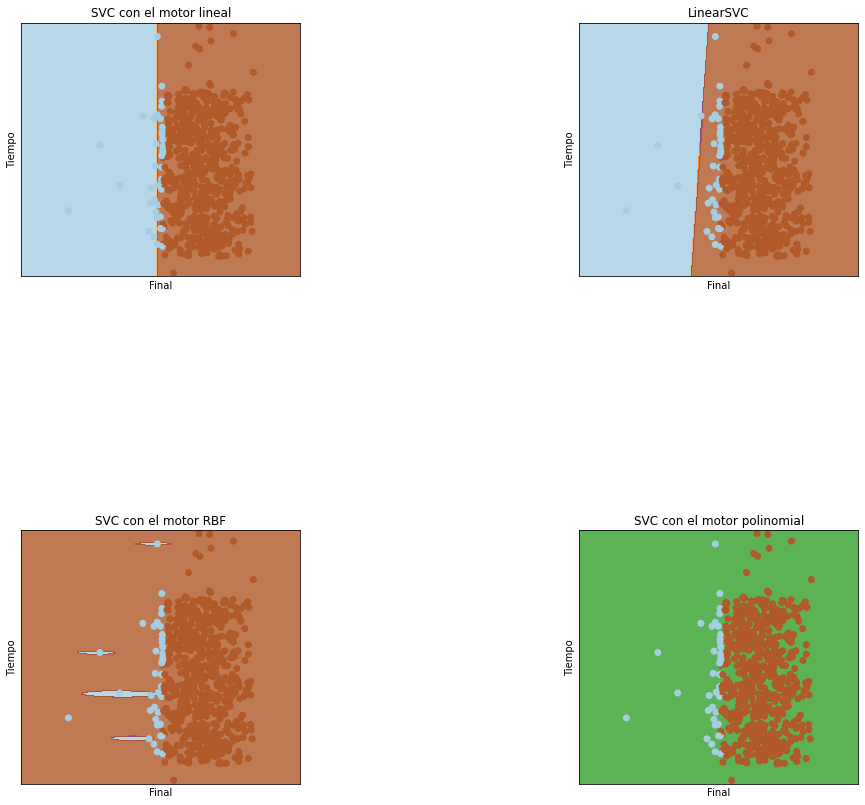

In [13]:

fig = plt.figure(1,figsize=(15,14))


# titulos de los graficos
titles = ['SVC con el motor lineal',
          'LinearSVC',
          'SVC con el motor RBF',
          'SVC con el motor polinomial']

for i, modelos in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Realizando el gráfico, se le asigna un color a cada punto
    
    ax = plt.subplot(2, 2, i + 1)
   
    plt.subplots_adjust(wspace=1, hspace=1)

    Z = modelos.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Graficando tambien los puntos de datos
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Final')
    plt.ylabel('Tiempo')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [14]:
#from mlxtend.plotting import plot_decision_regions
# Plot decision boundary
#plot_decision_regions(X_test, y_test, clf=rbf_svc, legend=2)
#plt.show()

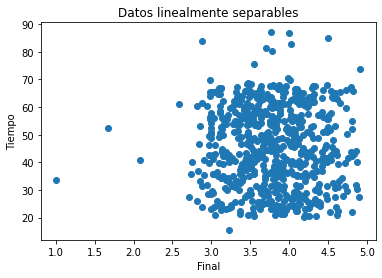

In [16]:
plt.scatter(X[:,0], X[:,1])
plt.title('Datos linealmente separables')
plt.xlabel('Final')
plt.ylabel('Tiempo')
plt.show()

# metricas

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))

print("")

print("LinearSVC")
print(classification_report(y_test, y_pred1))
print("SVC con el motor RBF")
print(classification_report(y_test, y_pred2))
print("SVC con el motor polinomial")
print(classification_report(y_test, y_pred3))
print("SVC con el motor RBF")
print(classification_report(y_test, y_pred4))

Accuracy: 0.9595959595959596
Accuracy: 0.9444444444444444
Accuracy: 0.9444444444444444
Accuracy: 0.9545454545454546

LinearSVC
              precision    recall  f1-score   support

           0       1.00      0.27      0.43        11
           1       0.96      1.00      0.98       187

    accuracy                           0.96       198
   macro avg       0.98      0.64      0.70       198
weighted avg       0.96      0.96      0.95       198

SVC con el motor RBF
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.94      1.00      0.97       187

    accuracy                           0.94       198
   macro avg       0.47      0.50      0.49       198
weighted avg       0.89      0.94      0.92       198

SVC con el motor polinomial
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.94      1.00      0.97       187

    ac

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

# Probar modelo

In [18]:
print (svc.predict([[3.7,3.5]])) 
print (rbf_svc.predict([[2.7,3.5]])) 
print (poly_svc.predict([[4.7,3.5]])) 
print (lin_svc.predict([[1.7,3.5]])) 


[1]
[1]
[1]
[0]
